# Building data-set

#### Get raw data from API

In [47]:
import requests
import csv
import os
import time

import pandas as pd

In [29]:
tickers_df = pd.read_csv('in/TICKERS.csv')

counter = 0

for index, row in tickers_df.iterrows():

    ticker = (f'{row["ticker"]}.SAO')
    path = (f'data/{ticker}.csv')

    key = 'XLSA5LZF5KUUXJX3'

    if not os.path.exists(path):
        
        if counter == 5:
            print('waiting...')
            time.sleep(70)
            counter = 0
        
        url = (f'https://www.alphavantage.co/query?apikey={key}&function=TIME_SERIES_DAILY_ADJUSTED&symbol={ticker}&datatype=csv&outputsize=full')

        response = requests.get(url)
        counter += 1

        if response.status_code == 200:
            content = response.content.decode()
            
            reader = csv.reader(content.splitlines(), delimiter=',')
            
            dataset = list(reader)
            
            with open(path, mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerows(dataset)
                
            print(f"New .csv downloaded for {ticker}: {response.status_code}")
        else:
            print(f"Request failed for {ticker}: {response.status_code}")

New .csv downloaded for GOLL3.SAO: 200
New .csv downloaded for RADL4.SAO: 200
New .csv downloaded for JHSF3.SAO: 200
New .csv downloaded for UGPA3.SAO: 200
New .csv downloaded for HGTX3.SAO: 200
waiting...
New .csv downloaded for ELET3.SAO: 200
New .csv downloaded for SULA11.SAO: 200
New .csv downloaded for CRFB3.SAO: 200
New .csv downloaded for EVEN3.SAO: 200
New .csv downloaded for HYPE4.SAO: 200
waiting...
New .csv downloaded for LAME3.SAO: 200
New .csv downloaded for BIDI11.SAO: 200
New .csv downloaded for MEAL3.SAO: 200
New .csv downloaded for ALUP11.SAO: 200
New .csv downloaded for CMIG4.SAO: 200
waiting...
New .csv downloaded for ODPV3.SAO: 200
New .csv downloaded for BRSR6.SAO: 200
New .csv downloaded for CPFE4.SAO: 200
New .csv downloaded for RAPT4.SAO: 200
New .csv downloaded for CVCB11.SAO: 200
waiting...
New .csv downloaded for SMLS3.SAO: 200
New .csv downloaded for ENAT3.SAO: 200
New .csv downloaded for SBSP3.SAO: 200
New .csv downloaded for HBSA3.SAO: 200
New .csv downloa

#### Assemble data-set

In [48]:
with open("out/output.csv", mode='w', newline='') as file:
    
    writer = csv.writer(file)
    
    # write header
    writer.writerow(['ticker', 'av_close', 
                     'av_volume', 'av_dividend_amount',
                     'highest', 'lowest',
                     'difference'
                     ])
    
    tickers_df = pd.read_csv('in/TICKERS.csv')
    
    for index, row in tickers_df.iterrows():
        
        path = (f'data/{row["ticker"]}.SAO.csv')
        
        if os.path.exists(path):
            df = pd.read_csv(path)
            
            writer.writerow([
                                row['ticker'], 
                                df['close'].mean(), 
                                df['volume'].mean(), 
                                df['dividend_amount'].mean(),
                                df['close'].max(),
                                df['close'].min(),
                                df['close'].max() - df['close'].min(),
                            ]) 


In [49]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('out/output.csv')

del df['ticker']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print(scaled_df)

    av_close  av_volume  av_dividend_amount   highest    lowest  difference
0   0.307310   1.781047            0.175290  0.039110 -0.422411    0.048439
1   2.019950   0.056882            0.303556 -0.001671  0.392913   -0.010318
2   1.561551   0.614058           -0.100061  1.346004  1.504348    1.314068
3   0.253105   0.836579           -0.095420 -0.286425  1.037297   -0.309499
4  -0.499193   1.647956           -0.246502 -0.215924 -0.457618   -0.206041
..       ...        ...                 ...       ...       ...         ...
81 -1.194245   0.315481           -0.217510 -0.431927 -0.390910   -0.423700
82  0.093950  -0.561460           -0.039901 -0.083110 -0.335319   -0.075804
83 -0.763146  -0.474965            8.759821  0.511044 -0.188932    0.515645
84  0.477917  -0.526572           -0.141073 -0.189075  0.376236   -0.197518
85 -0.329514  -0.540767           -0.128005 -0.278663  0.072343   -0.280497

[86 rows x 6 columns]


#### Checking feature correlation

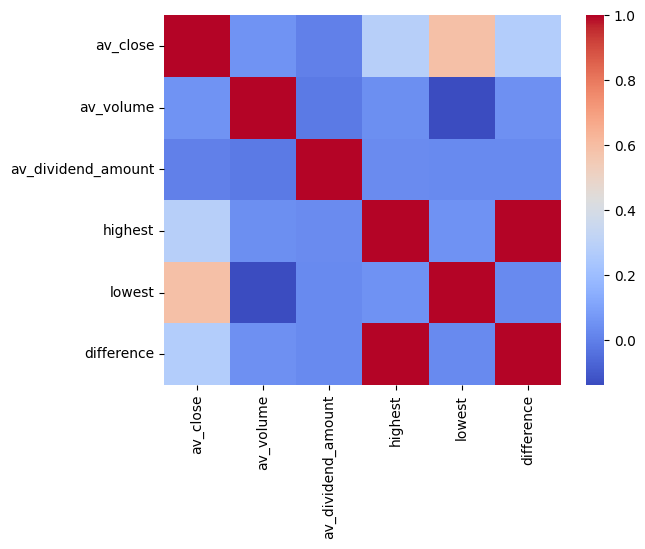

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('out/output.csv')
del df['ticker']

sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

# Building cluster model

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [52]:
X = scaled_df[['av_close', 'av_volume', 'av_dividend_amount', 'highest', 'lowest']]

#### Evaluating best k

/home/carled7/Repositories/clustering-stocks/clustering-stocks-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/carled7/Repositories/clustering-stocks/clustering-stocks-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/carled7/Repositories/clustering-stocks/clustering-stocks-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/carled7/Repositories/clustering-stocks/clustering-stocks-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: Futur

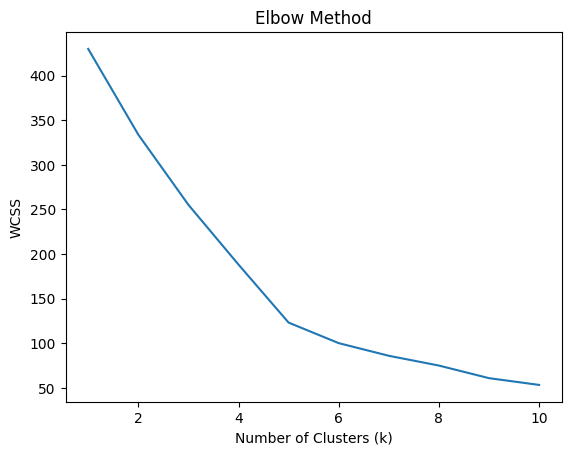

In [53]:
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

/home/carled7/Repositories/clustering-stocks/clustering-stocks-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/carled7/Repositories/clustering-stocks/clustering-stocks-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/carled7/Repositories/clustering-stocks/clustering-stocks-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/carled7/Repositories/clustering-stocks/clustering-stocks-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: Futur

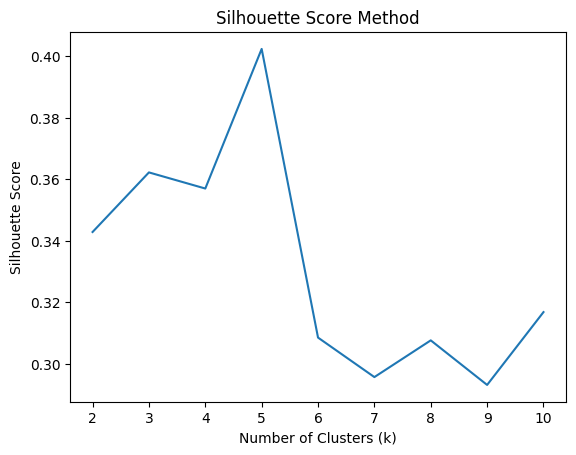

In [54]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # Test different values of k
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

#### Training and vizualizing results

In [55]:
kmeans = KMeans(n_clusters=5)  
kmeans.fit(X)

labels = kmeans.labels_

/home/carled7/Repositories/clustering-stocks/clustering-stocks-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


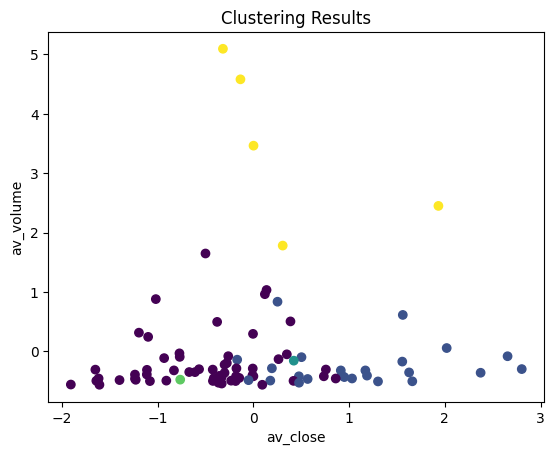

In [56]:
# Example visualization using matplotlib

plt.scatter(X['av_close'], X['av_volume'], c=labels)
plt.xlabel('av_close',)
plt.ylabel('av_volume')
plt.title('Clustering Results')
plt.savefig('out/chart.jpg', format='jpg')
plt.show()


In [57]:
print(labels)

[4 1 1 1 0 0 4 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 4 1 4 0 0
 0 0 0 0 0 1 0 2 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 4 1 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 3 1 0]
